# Crypto Arbitrage

In this program, we are sorting through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. We are applying the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This analysis consists of 3 phases.

1. Collecting the data.

2. Preparing the data.

3. Analyzing the data. 



###  Importing the required libraries and dependencies.

In [211]:
import pandas as pd
from pathlib import Path
%matplotlib inline

# Collecting the Data

1. Using the Pandas `read_csv` function and the `Path` module, importing the data from `bitstamp.csv` file, and creating a DataFrame called `bitstamp`. Setting the DatetimeIndex as the Timestamp column, and parsing and formatting the dates.

2. Using the `head` function to confirm that Pandas properly imported the data.

3. Repeating Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, importing the data from `bitstamp.csv` file, and creating a DataFrame called `bitstamp`. Setting the DatetimeIndex as the Timestamp column, parsing and formatting the dates.

In [212]:
# Reading in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Setting the index to the column "Date"
# Setting the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("./Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [213]:
# Using the head function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeating Steps 1 and 2 for `coinbase.csv` file.

In [214]:
# Reading in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Setting the index to the column "Timestamp"
# Setthing the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("./Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [215]:
# Using the head function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


# Preparing the Data


1. For the bitstamp DataFrame, dropping all `NaN' values in the DataFrame.

2. Using the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Converting the data type of the Close column to a `float`.

4. Reviewing the data for duplicated values, and dropping them if necessary.

5. Repeating Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, dropping all `NaN` values in the DataFrame.

In [216]:
# For the bitstamp DataFrame = dropping all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [217]:
# Using the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$","")

C:\Users\Chris\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


### Step 3: Converting the data type of the Close column to a `float`.

In [218]:
# Converting the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")

### Step 4: Reviewing the data for duplicated values, and drop them if necessary.

In [219]:
# Reviewing the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [220]:
# Repeating Steps for coinbase DataFrame
coinbase = coinbase.dropna()

In [221]:
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$","")

C:\Users\Chris\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [222]:
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")

In [223]:
bitstamp.duplicated().sum()

0

# Analyzing the Data

1. Choosing the columns of data on which to focus analysis.

2. Getting the summary statistics and plotting the data.

3. Focusing analysis on specific dates.

4. Calculating the arbitrage profits.

### Step 1: Choosing columns of data on which to focus analysis.

Selecting the data to analyze using `loc` and `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [224]:
# Using loc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,"Close"]
# Reviewing the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [225]:
# Using iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, 3]

# Reviewing the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Getting summary statistics and plotting the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames by:

1. Generating the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, creating a line plot for the full period of time in the dataset.

3. In one plot, overlaying the visualizations created in Step 2 for bitstamp and coinbase.

4. Using the `loc` and `plot` functions, plotting the price action of the assets on each exchange for different dates and times. The goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define

In [226]:
# Generating the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [227]:
# Generating the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

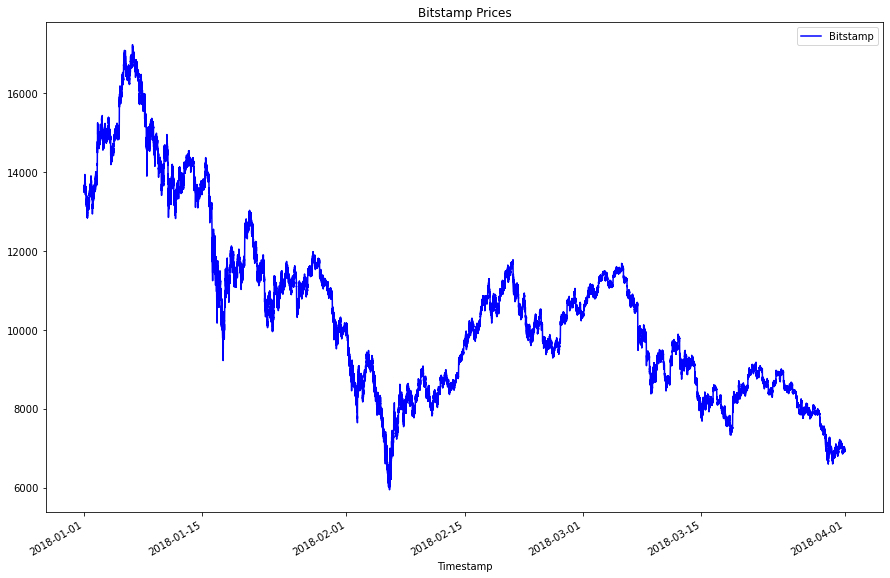

In [228]:
# Creating a line plot for the bitstamp DataFrame for the full length of time in the dataset 
bitstamp_sliced.plot(legend=True, figsize=(15, 10), title="Bitstamp Prices", color="blue", label="Bitstamp")

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

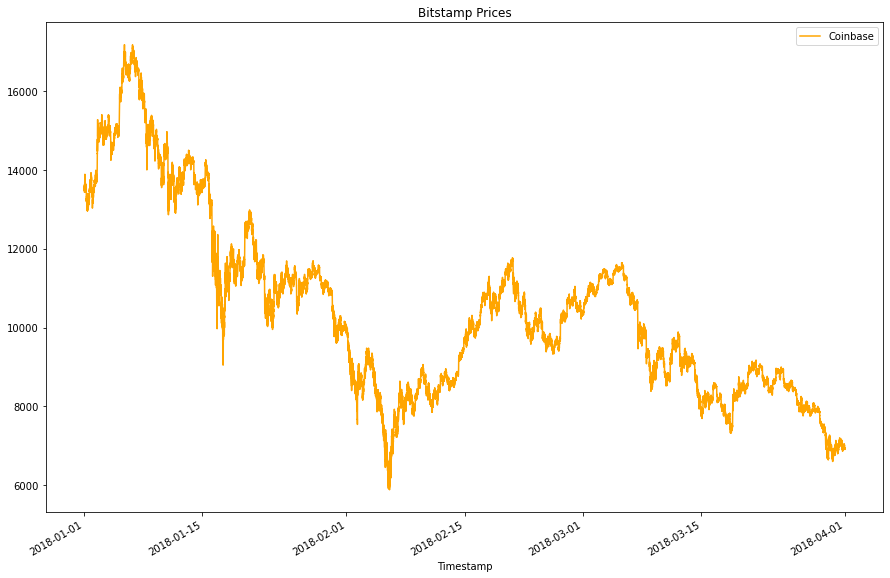

In [229]:
# Creating a line plot for the coinbase DataFrame for the full length of time in the dataset 
coinbase_sliced.plot(legend=True, figsize=(15, 10), title="Bitstamp Prices", color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

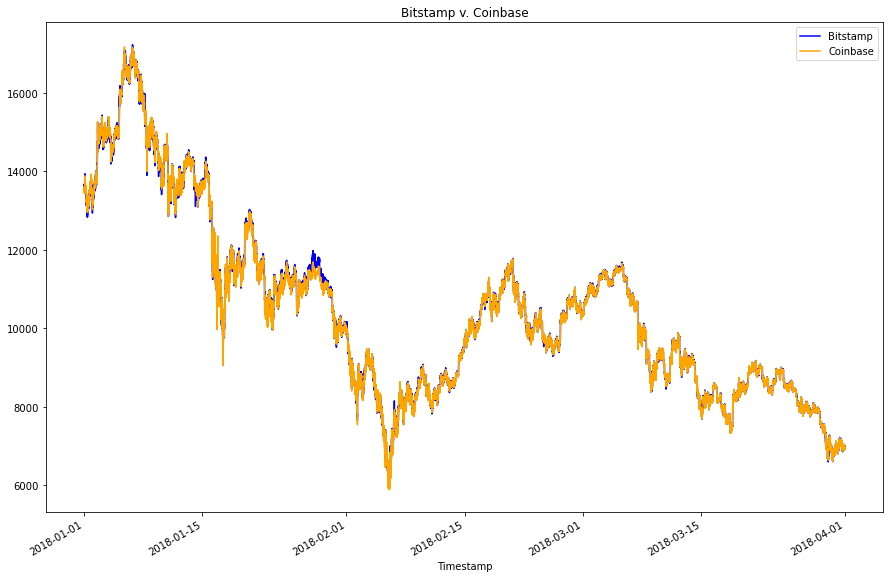

In [230]:
# Overlaying the visualizations for the bitstamp and coinbase DataFrames in one plot
bitstamp_sliced.plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase in January 2018'}, xlabel='Timestamp'>

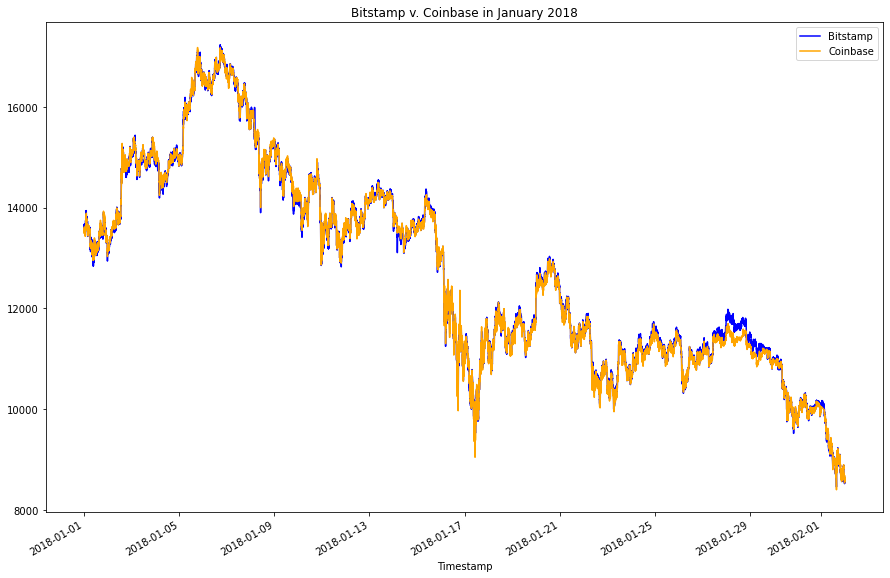

In [231]:
# Using the loc and plot functions, creating an overlay plot that visualizes the price action of both DataFrames for a one month period early in the dataset
bitstamp_sliced.loc["2018-01-01" : "2018-02-01"].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase in January 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-01-01" : "2018-02-01"].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase in March 2018'}, xlabel='Timestamp'>

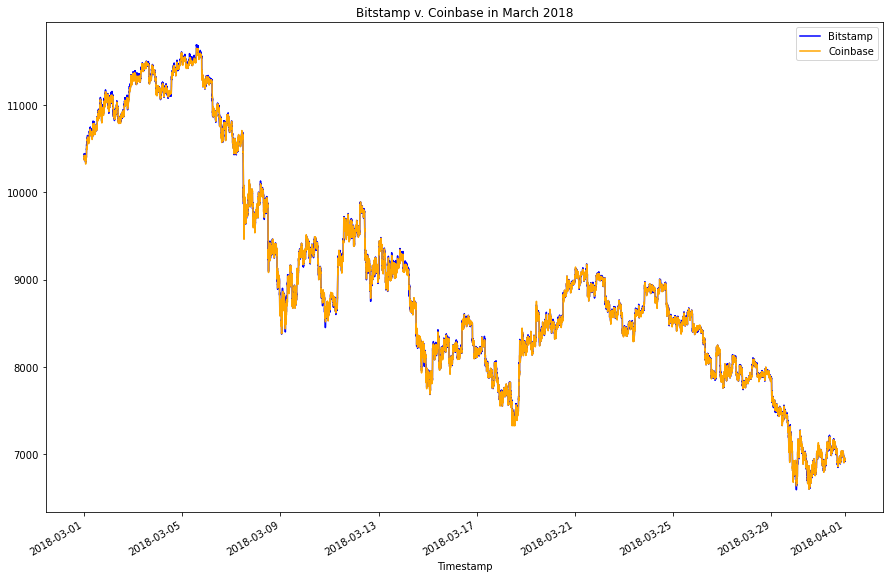

In [232]:
# Using the loc and plot functions, creating an overlay plot that visualizes the price action of both DataFrames for a one month period later in the dataset
bitstamp_sliced.loc["2018-03-01" : "2018-04-01"].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase in March 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-03-01" : "2018-04-01"].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

# Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

Based on the visualizations of the time periods analyzed, it is clear that the degree of spread between bitstamp and coinbase has reduced between January 1st, 2018 and March 31st, 2018.  It is possible that the opportunity for arbitrage between the prices on the two exchanges was identified and executed at a larger scale at some point between these periods.  This is a possible explanation for why we observe a reduction in spread during the time period analyzed.

### Step 3: Focusing Analysis on Specific Dates

1. Selecting three dates to evaluate for arbitrage profitability: one date that’s early in the dataset, one from the middle of the dataset, and one from the later in the dataset.

2. For each of the three dates, generating the summary statistics creating a box plot. This big-picture view is meant to help gain a better understanding of the data before arbitrage calculations.

<AxesSubplot:title={'center':'Jan 16th, 2018'}, xlabel='Timestamp'>

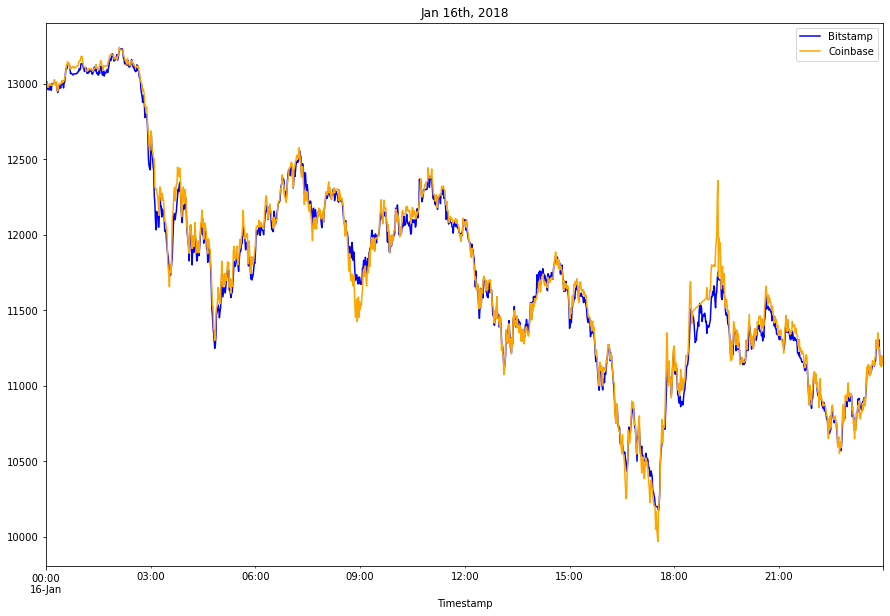

In [233]:
# Creating an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
bitstamp_sliced.loc["2018-01-16"].plot(legend=True, figsize=(15, 10), title="Jan 16th, 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-01-16"].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [234]:
# Using the early date that was selected, calculating the arbitrage spread by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase['Close'].loc['2018-01-16'] - bitstamp['Close'].loc['2018-01-16']

# Generating summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Early Date'}>

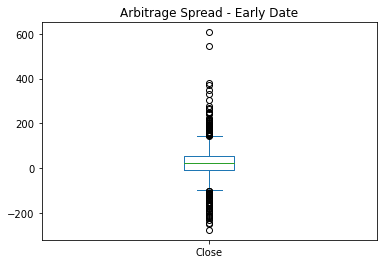

In [235]:
# Visualizing the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(title="Arbitrage Spread - Early Date", kind="box")

<AxesSubplot:title={'center':'February 24, 2018'}, xlabel='Timestamp'>

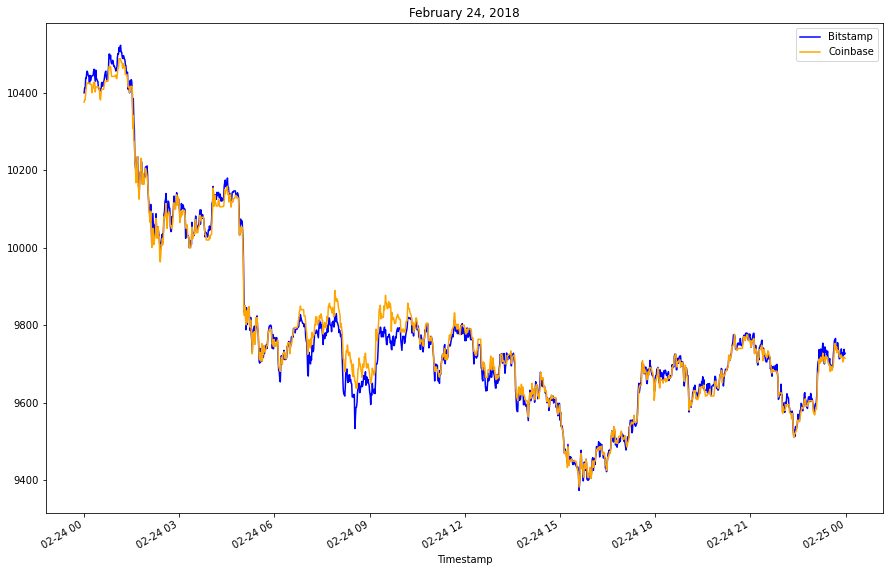

In [236]:
# Creating an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
bitstamp_sliced.loc["2018-02-24"].plot(legend=True, figsize=(15, 10), title="February 24, 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-02-24"].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [237]:
# Using the date in the middle that was selected, calculating the arbitrage spread by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase['Close'].loc['2018-02-24'] - bitstamp['Close'].loc['2018-02-24']

# Generating summary statistics 
arbitrage_spread_middle.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Middle Date'}>

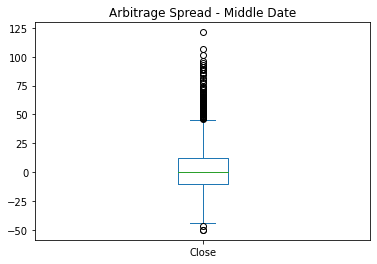

In [238]:
# Visualizing the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(title="Arbitrage Spread - Middle Date", kind="box")

<AxesSubplot:title={'center':'March 26th, 2018'}, xlabel='Timestamp'>

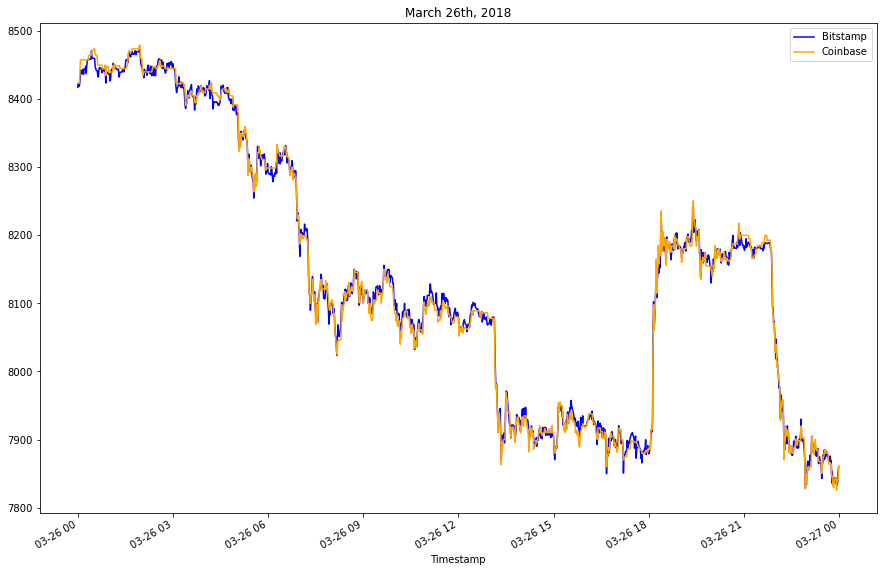

In [239]:
# Creating an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
bitstamp_sliced.loc["2018-03-26"].plot(legend=True, figsize=(15, 10), title="March 26th, 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-03-26"].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [240]:
# Using the date from the late day that was selected, calculating the arbitrage spread by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase['Close'].loc['2018-03-26'] - bitstamp['Close'].loc['2018-03-26']

# Generating summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1432.000000
mean       -0.722193
std         8.523060
min       -32.040000
25%        -6.812500
50%        -0.730000
75%         4.965000
max        35.070000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Late Date'}>

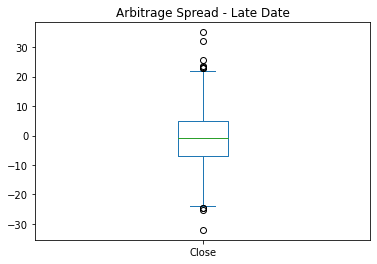

In [241]:
# Visualizing the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(title="Arbitrage Spread - Late Date", kind="box")

### Step 4: Calculating the Arbitrage Profits

Calculating the potential profits for each date selected in the previous section. The goal is to determine whether arbitrage opportunities still exist in the Bitcoin market.

1. For each of the three dates, measuring the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then using a conditional statement, generating the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculating the spread returns by diving the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Reviewing the resulting DataFrame.

3. For each of the three dates, narrowing down trading opportunities even further by determining the number of times trades with positive returns exceed the 1% minimum threshold needed to cover costs.

4. Generating the summary statistics of the spread returns that are greater than 1%.

5. For each of the three dates, calculating the potential profit, in dollars, per trade by multiplying the spread returns that were greater than 1% by the cost of what was purchased.

6. Generating the summary statistics, and plotting the results for each of the three DataFrames.

7. Calculating the potential arbitrage profits that can be made on each day by summing the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plotting the cumulative sum of each of the three DataFrames.

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measuring the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one, then using a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [242]:
# For all the dates selected in the dataset, measuring the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase['Close'].loc['2018-01-16'] - bitstamp['Close'].loc['2018-01-16']
arbitrage_spread_middle = coinbase['Close'].loc['2018-02-24'] - bitstamp['Close'].loc['2018-02-24']
arbitrage_spread_late = coinbase['Close'].loc['2018-03-26'] - bitstamp['Close'].loc['2018-03-26']

# Using a conditional statement to generate the summary statistics for the early arbitrage_spread DataFrame
early_profitable_arbitrage = arbitrage_spread_early[arbitrage_spread_early>0]
early_profitable_arbitrage.describe()

count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64

In [243]:
# Using a conditional statement to generate the summary statistics for the middle arbitrage_spread DataFrame
middle_profitable_arbitrage = arbitrage_spread_middle[arbitrage_spread_middle>0]
middle_profitable_arbitrage.describe()

count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64

In [244]:
# Using a conditional statement to generate the summary statistics for the late arbitrage_spread DataFrame
late_profitable_arbitrage = arbitrage_spread_late[arbitrage_spread_late>0]
late_profitable_arbitrage.describe()

count    651.000000
mean       6.689247
std        5.240159
min        0.010000
25%        2.835000
50%        5.230000
75%        9.195000
max       35.070000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [245]:
# For the date early in the dataset, calculating the spread returns by dividing the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin from the bitstamp exchange.
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp['Close'].loc['2018-01-16']
# Reviewing the spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
Name: Close, dtype: float64

In [246]:
# For the date middle of the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin from the bitstamp exchange
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp['Close'].loc['2018-02-24']
# Reviewing the spread return DataFrame
spread_return_middle.head()

Timestamp
2018-02-24 00:00:00   NaN
2018-02-24 00:01:00   NaN
2018-02-24 00:02:00   NaN
2018-02-24 00:03:00   NaN
2018-02-24 00:04:00   NaN
Name: Close, dtype: float64

In [247]:
# For the late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin from the bitstamp exchange
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp['Close'].loc['2018-03-26']
# Reviewing the spread return DataFrame
spread_return_middle.head()

Timestamp
2018-02-24 00:00:00   NaN
2018-02-24 00:01:00   NaN
2018-02-24 00:02:00   NaN
2018-02-24 00:03:00   NaN
2018-02-24 00:04:00   NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrowing down trading opportunities even further by determining the number of times trades with positive returns exceed the 1% minimum threshold needed to cover costs.

In [248]:
# For the date early in the dataset, determining the number of times trades with positive returns exceed the 1% minimum threshold (.01) needed to cover costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Reviewing the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64

In [249]:
# For the date in the middle of the dataset, determining the number of times trades with positive returns exceed the 1% minimum threshold (.01) needed to cover costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Reviewing the first five profitable trades
profitable_trades_middle.head()

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

In [250]:
# For the date late in the dataset, determining the number of times trades with positive returns exceed the 1% minimum threshold (.01) needed to cover costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Reviewing the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generating the summary statistics of the spread returns that are greater than 1%

In [251]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

In [252]:
# For the date in the midle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

In [253]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

## How do the average returns compare between the early, middle, and late dates?

The average returns drastically lessen as your progress further in time within the dataset

#### 5. For each of the three dates, calculating the potential profit, in dollars, per trade by multiplying the spread returns that were greater than 1% by the cost of what was purchased. Dropping NaN values from the dataframe.

In [254]:
# For the date early in the dataset, calculating the potential profit per trade in dollars and multiplying the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-16']

# Dropping any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# Viewing the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64

In [255]:
# For the date in the middle of the dataset, calculating the potential profit per trade in dollars and multiplying the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp['Close'].loc['2018-02-24']

# Dropping any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# Viewing the middle profit DataFrame
profit_per_trade_middle

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64

In [256]:
# For the date late in the dataset, calculating the potential profit per trade in dollars and multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp['Close'].loc['2018-03-26']

# Dropping any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# Viewing the late profit DataFrame
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generating the summary statistics, and plotting the results for each of the three DataFrames.

In [257]:
# Generatubg the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

In [258]:
# Generatubg the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count      3.000000
mean     110.023333
std       10.129246
min      101.750000
25%      104.375000
50%      107.000000
75%      114.160000
max      121.320000
Name: Close, dtype: float64

In [259]:
# Generatubg the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timestamp'>

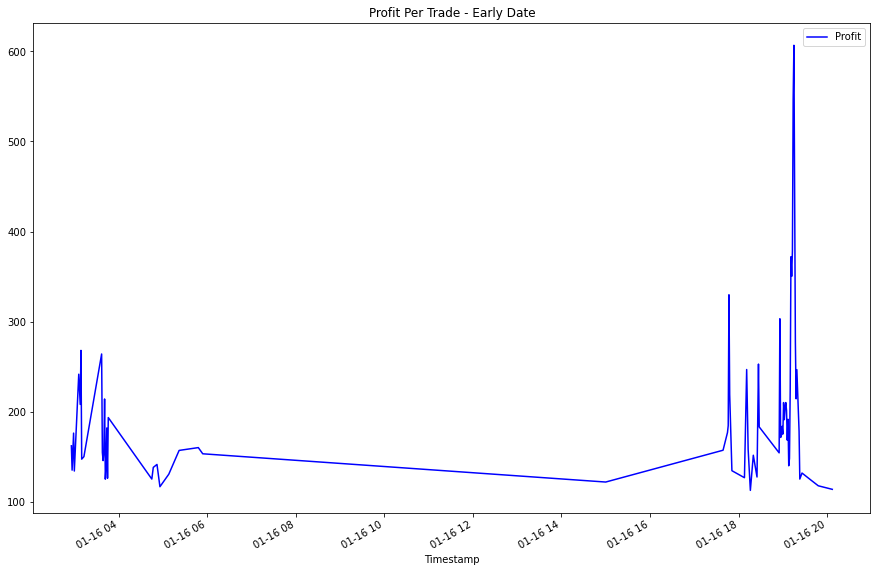

In [260]:
# Plotting the results for the early profit per trade DataFrame
profit_per_trade_early.plot(legend=True, figsize=(15, 10), title="Profit Per Trade - Early Date", color="blue", label="Profit")

<AxesSubplot:title={'center':'Profit Per Trade - Middle Date'}, xlabel='Timestamp'>

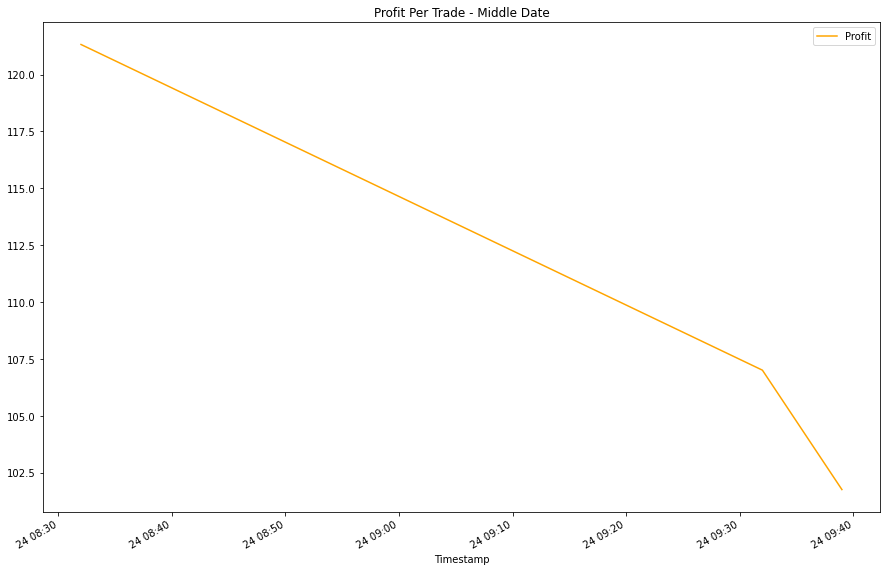

In [261]:
# Plotting the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(legend=True, figsize=(15, 10), title="Profit Per Trade - Middle Date", color="orange", label="Profit")

<AxesSubplot:title={'center':'Profit Per Trade - Late Date'}, xlabel='Timestamp'>

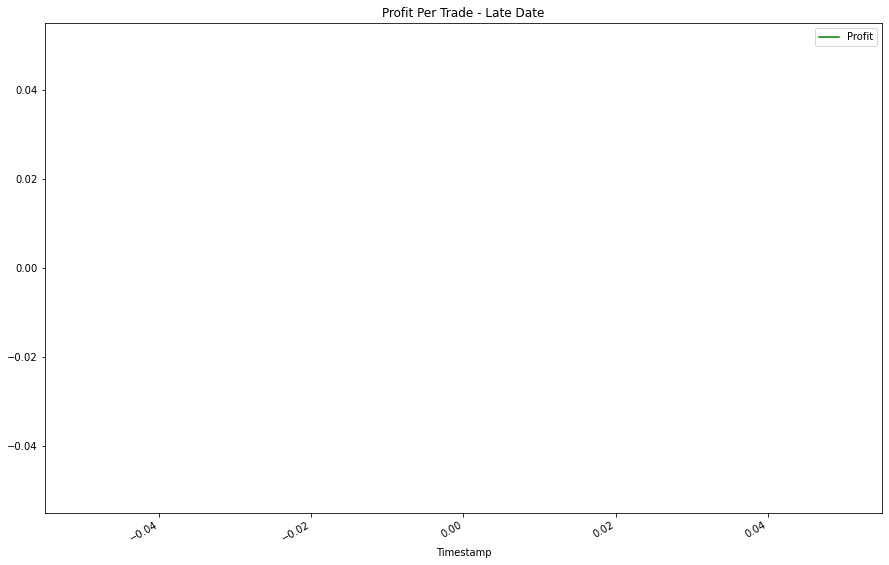

In [262]:
# Plotting the results for the middle late per trade DataFrame
profit_per_trade_late.plot(legend=True, figsize=(15, 10), title="Profit Per Trade - Late Date", color="green", label="Profit")

#### 7. Calculating the potential arbitrage profits that can be made on each day by summing the elements in the profit_per_trade DataFrame.

In [263]:
# Calculatubg the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

14147.169999999998

In [264]:
# Calculating the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

330.0699999999997

In [265]:
# Calculating the sum of the potential profits for the late profit per trade DataFrame
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

0.0

#### 8. Using the `cumsum` function, plotting the cumulative sum of each of the three DataFrames

In [266]:
# Using the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Profits Sum - Early Date'}, xlabel='Timestamp'>

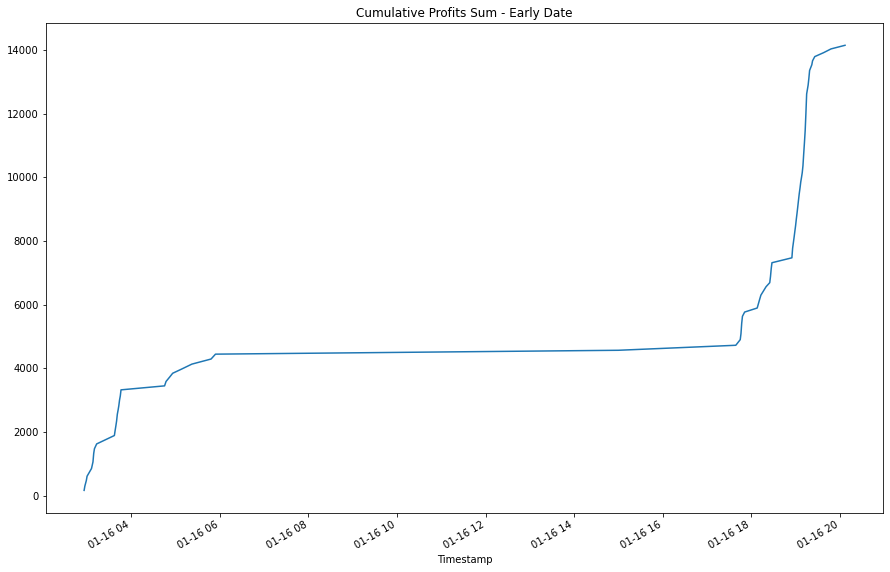

In [267]:
# Plotthing the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(15, 10), title="Cumulative Profits Sum - Early Date")

In [268]:
# Using the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Profits Sum - Middle Date'}, xlabel='Timestamp'>

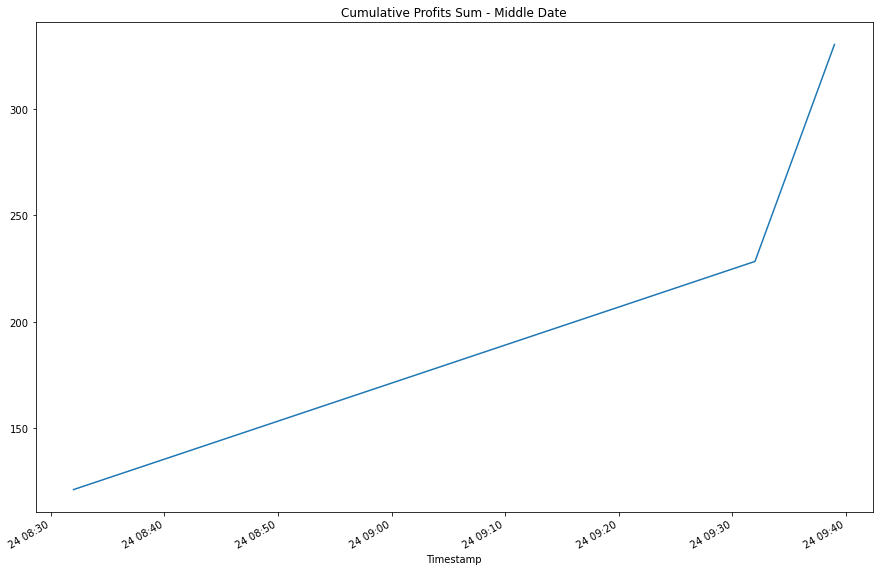

In [269]:
# Plotthing the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(15, 10), title="Cumulative Profits Sum - Middle Date")

In [270]:
# Using the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Profits Sum - Late Date'}, xlabel='Timestamp'>

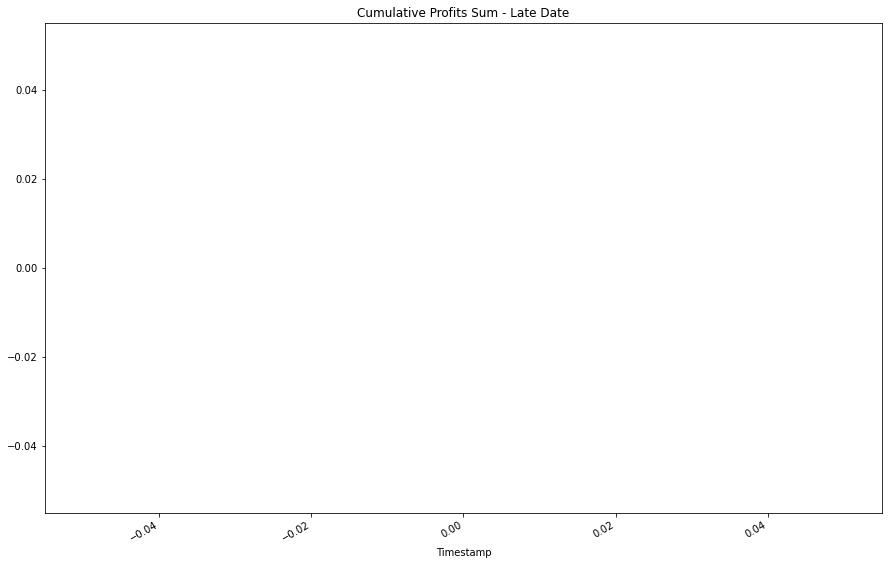

In [271]:
# Plotting the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(figsize=(15, 10), title="Cumulative Profits Sum - Late Date")

## After reviewing the profit information across each date from the different time periods, is there a pattern or trend?
    
It is clear that as time progresses through the data, the spread between the bitcoin prices of the two exchanges narrows greatly.  This drastically reduces the potential return of arbitrage as you move further in time from January to March, 2018.  Upon analysis, the spread between the prices is so extreme, that in March there was no potential profits from arbitrage between bitcoin prices from bitstamp and coinbase (after factoring in trade costs).  Although the cause for this reduction in spread is not proven in this analysis, it is a reasonable assumption that arbitrage betweeen these two exchanges rapidly increased in the February of 2018, greatly reducing the spread in price, and by March had virtually eliminated opportunites for further arbitrage (given the assumed trading costs).